# Test libsurface.cpp - Image 2D

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.random.seed(0)
img1 = np.random.randint(0, 256, (10,10), dtype=np.uint8)
img2 = np.random.randint(0, 256, (10,10), dtype=np.uint8)

bool_img = np.random.randint(0, 2, (10,10), dtype=bool)
neigh1 = np.array([[True, False],[True, False]])
neigh2 = np.array([[False, True],[True, False]])

In [9]:
from time import time
from nice.utils import print_dir
from nice.plot import matplotlib_plot, imshow_colorspace, line
import euchar.cppbinding.utils as u
import euchar.cppbinding.surface as s
from euchar.display import euler_curve_plot

Plot

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import arange, array, meshgrid, rot90
# For contours levels
from matplotlib.ticker import MaxNLocator

def plot_contour_surface(surface, nbins=15, dx=0.05, dy=0.05,
    title="Contourf", color_map='RdYlBu',
    xlabel="", ylabel="", xticks=[], yticks=[],
    figsize=(4,4), save=False, filename="--", dpi=220):
    """
    Plot contours of function

    Parameters
    ----------
    nbins
        int, regulates the smoothness of the contours
    color_map
        string, options are: 'viridis', 'plasma', 'inferno', 'magma',
        'Greys', 'OrRd', 'Reds',
        'binary', 'cool', 'hot', 'afmhot', 'coppet', 'PRGn', 'PiYG',
        'RdBu', 'RdYlBu', 'Spectral', 'coolwarm' and others.
    """

    # Contours levels
    levels = MaxNLocator(nbins=nbins).tick_values(surface.min(), surface.max())
    # Color map
    cmap = plt.get_cmap(color_map)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    x = arange(surface.shape[1])
    y = arange(surface.shape[0])
    xx, yy = meshgrid(x, y)

    # Plot the surface.
    cf = ax.contourf(xx + dx/2.,
                     yy + dy/2.,
                     surface,
                     levels=levels,
                     cmap=cmap)
    fig.colorbar(cf, ax=ax)

    ax.set(xlabel=xlabel, ylabel=ylabel, xticks=xticks, yticks=yticks)
    #ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
    #ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))
    ax.set_title(title)
    fig.tight_layout()

    if save == True:
        plt.savefig(fname=filename, dpi=dpi)
    else:
        plt.show()

***

### Naive surface of 2 images 2D

In [10]:
st = time()
naive = np.array(s.naive_images_2d(img1, img2, 255, 255))
print(f"time: {time() - st:.2f}")

time: 33.13


### Surface of 2D images

In [6]:
v = u.vector_of_euler_changes_2d()

In [11]:
st = time()
surf = np.array(s.images_2d(img1, img2, v, 255, 255))
print(f"time: {time() - st:.2f}")

time: 0.06


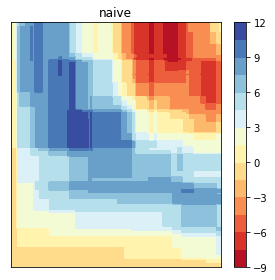

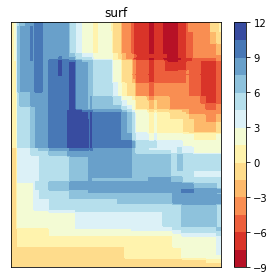

In [8]:
plot_contour_surface(naive, title="naive")
plot_contour_surface(surf, title="surf")

In [9]:
print(np.where(naive != surf)[0][:3], "\n", np.where(naive != surf)[1][:3])

[] 
 []


In [10]:
print("correct\n", naive[40: 43,246:256], end="\n---\n")
print("wrong\n", surf[40: 43,246:256])

correct
 [[6 6 6 6 7 7 7 7 7 7]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]]
---
wrong
 [[6 6 6 6 7 7 7 7 7 7]
 [6 6 6 6 6 6 6 6 6 6]
 [6 6 6 6 6 6 6 6 6 6]]


In [11]:
pad1 = np.array(u.pad_2d(img1, 255))
pad2 = np.array(u.pad_2d(img2, 255))
print(np.where(pad1 == 41))
print(pad1)
print("="*30)
print(np.where(pad2 == 41))
print(pad2)

(array([8], dtype=int64), array([5], dtype=int64))
[[255 255 255 255 255 255 255 255 255 255 255 255]
 [255 172  10 127 140  47 170 196 151 117 166 255]
 [255  22 183 192 204  33 216  67 179  78 154 255]
 [255 251  82 162 219 195 118 125 139 103 125 255]
 [255 229 216   9 164 116 108 211 222 161 159 255]
 [255  21  81  89 165 242 214 102  98  36 183 255]
 [255   5 112  87  58  43  76  70  60  75 228 255]
 [255 216 189 132  14  88 154 178 246 140 205 255]
 [255 204  69  58  57  41  98 193  66  72 122 255]
 [255 230 125 174 202  39  74 234 207  87 168 255]
 [255 101 135 174 200 223 122  88  94 107 145 255]
 [255 255 255 255 255 255 255 255 255 255 255 255]]
(array([], dtype=int64), array([], dtype=int64))
[[255 255 255 255 255 255 255 255 255 255 255 255]
 [255  81 139 141 100 165 230 243 236  25  66 255]
 [255   9 214  77 107  47  18  72 152  95  86 255]
 [255   9  27  78  22 148 151 238 165 115   8 255]
 [255  45   5 208  19  69  94 243 146  38 213 255]
 [255 197  30   8 245 254  71  5

In [12]:
I, J = 8, 5
print(pad1[I-1:I+2, J-1:J+2], end="\n---\n")
print(pad2[I-1:I+2, J-1:J+2])

[[ 14  88 154]
 [ 57  41  98]
 [202  39  74]]
---
[[250  99  96]
 [124   8 205]
 [133 147 194]]


***

### Test equality

In [12]:
np.all(naive == surf)

True

In [13]:
for i in range(2):
    M = np.random.randint(150, 401)
    image1 = np.random.randint(0, M, (16, 16))
    image2 = np.random.randint(0, M, (16, 16))
    
    naive = np.array(s.naive_images_2d(image1, image2, M, M))
    surf = np.array(s.images_2d(image1, image2, v, M, M))
    print("i =", i, " | M =", M, end="  --> ")
    print(np.all(naive == surf), end="\n=================\n")

i = 0  | M = 277  --> True
i = 1  | M = 345  --> True
